<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. データをきちんと取り込もう


## 2.2 人の知覚に近づける

人間の聴覚は、音声波形のパワーをそのまま受容しているのではなく、聴覚機構でスペクトルに変換して知覚しています。

In [ ]:
# サンプル音声を取得
!wget https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.wav

--2023-05-24 07:09:15--  https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.wav [following]
--2023-05-24 07:09:15--  https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 601132 (587K) [audio/wav]
Saving to: ‘sample1.wav’

sample1.wav         100%[===================>] 587.04K  --.-KB/s    in 0.04s   

2023-05-24 07:09:15 (13.4 MB/s) - ‘sample1.wav’

In [ ]:
import IPython.display
IPython.display.Audio("sample1.wav")

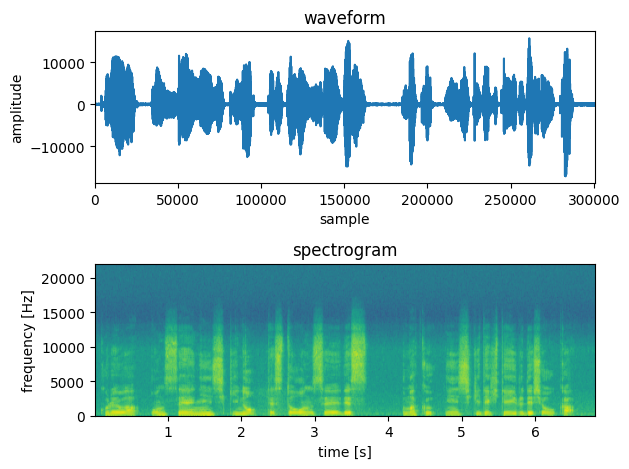

In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

fs, speech_data = read('sample1.wav')
 
plt.subplot(2,1,1)
plt.title("waveform")
plt.plot(speech_data)
plt.xlim(0, len(speech_data))
plt.xlabel("sample")
plt.ylabel("amplitude")
 
plt.subplot(2,1,2)
plt.title("spectrogram")
plt.specgram(speech_data, Fs=fs)
plt.xlabel("time [s]")
plt.ylabel("frequency [Hz]")
 
plt.tight_layout()

## 2.3 特徴抽出をしやすくする処理

ノイズが付加された画像に対してノイズフィルタを適用してみます。

In [ ]:
# サンプル画像を取得
!wget https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.jpg

--2023-05-24 07:09:55--  https://github.com/MasahiroAraki/SpeechRecognition/raw/master/Python/sampledata/sample1.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.jpg [following]
--2023-05-24 07:09:55--  https://raw.githubusercontent.com/MasahiroAraki/SpeechRecognition/master/Python/sampledata/sample1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1750 (1.7K) [image/jpeg]
Saving to: ‘sample1.jpg’

sample1.jpg         100%[===================>]   1.71K  --.-KB/s    in 0s      

2023-05-24 07:09:56 (24.5 MB/s) - ‘sample1.jpg’ 

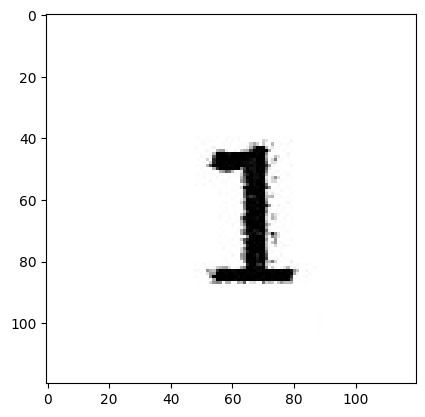

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

imagefile = 'sample1.jpg'
im = plt.imread(imagefile)
plt.imshow(im)
plt.gray()

平均値フィルタを適用。

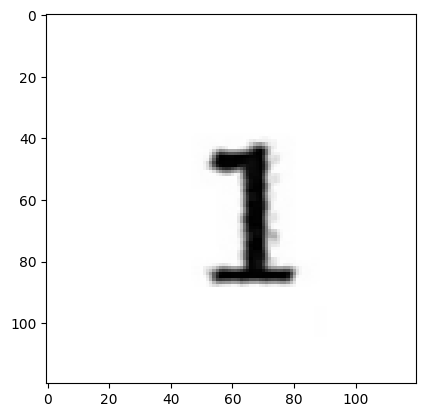

In [ ]:
(h, w) = im.shape

filter1 = np.full((3,3), 1/9)
im2 = np.full_like(im, 255)

for y in range(1,h-1):
  for x in range(1,w-1):
    t = im[x-1:x+2, y-1:y+2]
    im2[x,y] = np.sum(np.multiply(t, filter1))

plt.imshow(im2)
plt.gray()

SciPy の Multidimensional image processing ライブラリ [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html) を使い、関数化したコード

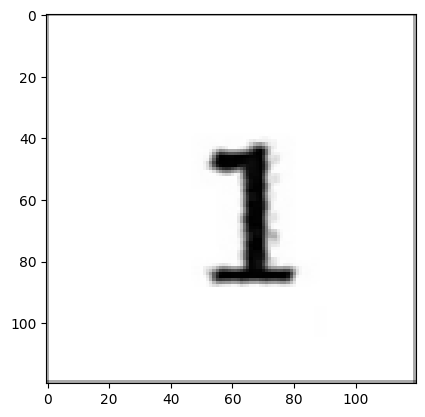

In [ ]:
from scipy.ndimage import convolve

def apply_average_filter(image):
  # Define the 3x3 kernel for the average filter
  kernel = np.full((3,3), 1/9)

  # Apply the average filter using the convolve function
  # extension of input image is done by constant value (0.0)
  filtered_image = convolve(image, kernel, mode='constant', cval=0.0)
    
  return filtered_image

plt.imshow(apply_average_filter(im))
plt.gray()

## 演習問題

上記の例を参考に、フィルタサイズ 5x5 のメディアンフィルタを実装せよ。

（応用問題）上記処理に加えて、ストライドを2にして画像圧縮を行え。

上記の例を参考に、Sobelフィルタを実装せよ。

解答例

[chap02a.ipynb](https://github.com/MasahiroAraki/SpeechRecognition/blob/master/Python/chap02a.ipynb)